# Análise de dados do Covid-19

In [220]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [30]:
xlsx = pd.ExcelFile('arquivos/COVID-19-2020-04-07.xlsx')
covid = pd.read_excel(xlsx, 'Sheet')

In [31]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
2,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
3,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0


In [32]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  9310 non-null   datetime64[ns]
 1   day                      9310 non-null   int64         
 2   month                    9310 non-null   int64         
 3   year                     9310 non-null   int64         
 4   cases                    9310 non-null   int64         
 5   deaths                   9310 non-null   int64         
 6   countriesAndTerritories  9310 non-null   object        
 7   geoId                    9286 non-null   object        
 8   countryterritoryCode     9125 non-null   object        
 9   popData2018              9172 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 727.5+ KB


In [166]:
covidFinal = covid[["countriesAndTerritories","cases","deaths"]].groupby("countriesAndTerritories").sum().sort_values(by=["cases","deaths"], ascending=False)
covidFinal.head(10)

,cases,deaths
countriesAndTerritories,,
United_States_of_America,368196,10989
Spain,135032,13055
Italy,132547,16525
Germany,99225,1607
China,82698,3335
France,74390,8911
Iran,60500,3739
United_Kingdom,51608,5373
Turkey,30217,649


In [162]:
writer = pd.ExcelWriter('arquivos/corona-final.xlsx', engine='xlsxwriter')
covidFinal.to_excel(writer, sheet_name='Covid-19')

In [163]:
workbook = writer.book
worksheet = writer.sheets['Covid-19']

In [164]:
writer.save()

In [289]:
listaTodos = covidFinal.index
i = 0
labels = []
while i < 10:
    labels.append(listaTodos[i])
    i = i + 1

deaths = covidFinal.get("deaths").head(10).to_list()
cases = covidFinal.get("cases").head(10).to_list()

In [290]:
deaths = list(map(lambda x: (x /1000), deaths))
cases = list(map(lambda x: (x /1000), cases))
print(cases)
width = 0.50

[10.989, 13.055, 16.525, 1.607, 3.335, 8.911, 3.739, 5.373, 0.649, 0.584]


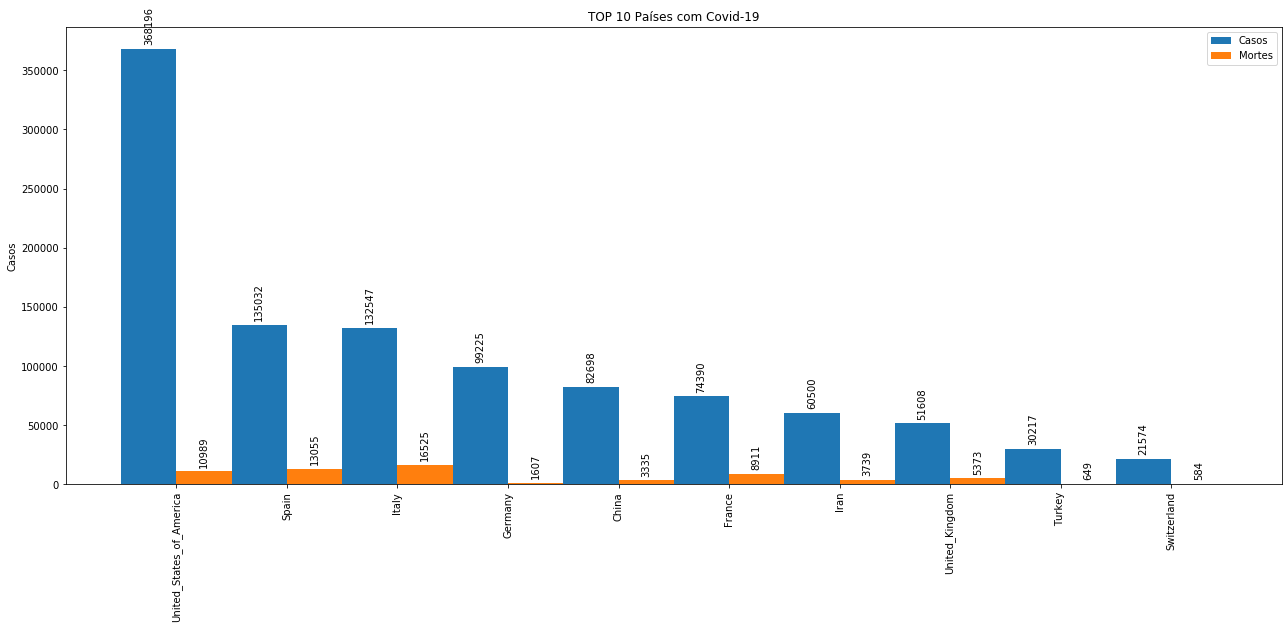

In [266]:
fig, ax = plt.subplots()
axCases = ax.bar(x - width/2, cases, width, label='Casos')
axDeaths = ax.bar(x + width/2, deaths, width, label='Mortes')
ax.set_ylabel('Casos')
ax.set_title('TOP 10 Países com Covid-19')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(axCases)
autolabel(axDeaths)

fig.tight_layout()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 8


plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = fig_size
plt.gcf().subplots_adjust(bottom=0.15)
plt.autoscale()
plt.show()


In [253]:
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]
